# Cómputo simbólico (Parte 2)

In [36]:
import sympy #Importando la libreria
import numpy as np
import matplotlib.pyplot as plt

Si todo lo que desea es la mejor impresión bonita, use la función init_printing (). Esto habilitará automáticamente la mejor impresora disponible en su entorno. 

In [2]:
sympy.init_printing()

## Sustituciones

In [5]:
x1 = sympy.Symbol('x1')
x2 = sympy.Symbol('x2')
expr = x1 * x2 + 2 * x1
expr #Funcion inicial expr(x1,x2)

In [9]:
values1 ={ 'x1': 0.5, 'x2':1.5}
expr.subs(values1) #Funcion evaluada en expr(x1=0.5,x2=1.5x|)

In [10]:
values2 ={ 'x1': sympy.Symbol('x'), 'x2':sympy.Symbol('y')}
expr.subs(values2) #Funcion evaluada en expr(x,y)

## Evaluación numérica

In [12]:
sympy.N(1 + sympy.pi) # 1+pi

In [14]:
expr_recta = 3*x1 + 45
expr_recta

In [17]:
expr_recta.subs(x1,1).evalf(3)

Ahora para mas variables

In [24]:
x, y, z = sympy.symbols("x y z")
expr_3var = 2 * x**3 + 4*x*y - 8 * z
expr_3var

In [25]:
expr_3var.subs([(x, 2), (y, 4), (z, 0)]) # Funcion evaluada en f(2,4,0)

In [30]:
expr_3var.subs([(x, sympy.cos(x)), (y, sympy.exp(y)), (z, 2*z)]) # Funcion evaluada en f(cos(x),e^x,2*z)

# Un método mas usual

In [33]:
expr_fin = sympy.sin(sympy.pi * x * sympy.exp(x))
expr_fin

In [37]:
expr_funct = sympy.lambdify(x, expr_fin, 'numpy')
x_val = np.arange(0, 12)
expr_funct(x_val)

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687,
        0.879394  , -0.98294789])

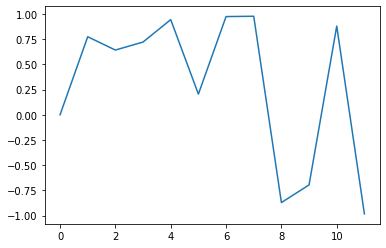

In [40]:
plt.plot(x_val,expr_funct(x_val))

Ahora retomando una función ya creada

In [42]:
expr_3var

In [49]:
expr_3var_l = sympy.lambdify((x,y,z), expr_3var, 'numpy')
x_val = np.arange(0, 12)
y_val = np.arange(10,22)
z_val = np.arange(20,32)
expr_3var_l(x_val,y_val,z_val)

array([-160, -122,  -64,   26,  160,  350,  608,  946, 1376, 1910, 2560,
       3338])

## Derivadas

In [63]:
x = sympy.Symbol('x')
f = sympy.Function('f')(x)
f

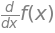

In [54]:
sympy.diff(f,x) #primera derivada

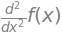

In [55]:
sympy.diff(f,x,x) #segunda derivada

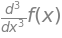

In [56]:
sympy.diff(f,x,3) # equivalente a sympy.diff(f,x,x,x)

Para cálculo de varias variables

In [57]:
g = sympy.Function('g')(x,y)

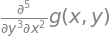

In [61]:
sympy.diff(g,x,2,y,3)

Veamos un ejemplo en una variable

In [70]:
f1_toDeriva = 5 * x**3 - 2 * x**2 + x + sympy.pi + sympy.sin(x)
f1_toDeriva # Funcion inicial

In [71]:
f1_toDeriva.diff(x) # Primera derivada

In [73]:
f1_toDeriva.diff(x,2) # Segunda derivada

Veamos un ejemplo en varias variables

In [103]:
x, y, z = sympy.symbols("x y z")
f2_toDeriva = 2 * x**3 * y ** 6 * z **6 + 4*z* sympy.log(z*y) - 8 * sympy.cos(x*y)
f2_toDeriva

In [104]:
f2_toDeriva.diff(x)# Derivada parcial respecto a x

In [105]:
f2_toDeriva.diff(x,y)# Derivada parcial respecto a x, despues a y

In [107]:
f2_toDeriva.diff(x,y,z)# Derivada parcial respecto a x, despues a y, despues a z

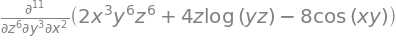

In [113]:
sympy.Derivative(f2_toDeriva,x,2,y,3,z,6) # Expresando solamente

## Integrales

In [116]:
a , b = sympy.symbols(' a , b')
x = sympy.Symbol('x')
f = sympy.Function('f')(x)
f

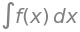

In [117]:
sympy.integrate(f) # Integral indefinida

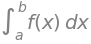

In [121]:
sympy.integrate(f, (x,a,b))

In [124]:
sympy.integrate(sympy.sin(x)) # Integral de sen(x)

In [127]:
sympy.integrate(sympy.sin(x), (x,2,3)) # Integral de sen(x) en el intervalo [2,3]

Fallos de integral

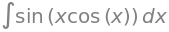

In [128]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

Expresiones multivariables para integrar en python

In [134]:
expr_multi = (x + y) ** 3
expr_multi

In [141]:
sympy.integrate(expr_multi,y)

In [142]:
sympy.integrate(expr_multi, x)

In [143]:
sympy.integrate(expr_multi,x,y)

In [144]:
sympy.integrate(expr_multi, (x,0,1) , (y,0,4))

## Series

In [150]:
x,y = sympy.symbols('x , y')
f = sympy.Function('f')(x)
f

In [149]:
sympy.series(f,x)

                             ⎛  2      ⎞│         ⎛  3      ⎞│         ⎛  4   
                           2 ⎜ d       ⎟│       3 ⎜ d       ⎟│       4 ⎜ d    
                          x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(ξ))⎟│      x ⋅⎜───(f(
                             ⎜  2      ⎟│         ⎜  3      ⎟│         ⎜  4   
         ⎛d       ⎞│         ⎝dξ       ⎠│ξ=0      ⎝dξ       ⎠│ξ=0      ⎝dξ    
f(0) + x⋅⎜──(f(ξ))⎟│    + ────────────────── + ────────────────── + ──────────
         ⎝dξ      ⎠│ξ=0           2                    6                    24

   ⎞│         ⎛  5      ⎞│           
   ⎟│       5 ⎜ d       ⎟│           
ξ))⎟│      x ⋅⎜───(f(ξ))⎟│           
   ⎟│         ⎜  5      ⎟│           
   ⎠│ξ=0      ⎝dξ       ⎠│ξ=0    ⎛ 6⎞
──────── + ────────────────── + O⎝x ⎠
                  120                

In [151]:
x0 = sympy.Symbol("{x_0}")
f.series(x,x0,n=3)

                                                            ⎛  2        ⎞│    
                                                          2 ⎜ d         ⎟│    
                                               (x - {x_0}) ⋅⎜────(f(ξ₁))⎟│    
                                                            ⎜   2       ⎟│    
                       ⎛ d        ⎞│                        ⎝dξ₁        ⎠│ξ₁={
f({x_0}) + (x - {x_0})⋅⎜───(f(ξ₁))⎟│         + ───────────────────────────────
                       ⎝dξ₁       ⎠│ξ₁={x_0}                    2             

                                 
                                 
                                 
                                 
x_0}    ⎛           3           ⎞
──── + O⎝(x - {x_0}) ; x → {x_0}⎠
                                 

In [154]:
f.series(x,x0,n=4)

                                                            ⎛  2        ⎞│    
                                                          2 ⎜ d         ⎟│    
                                               (x - {x_0}) ⋅⎜────(f(ξ₁))⎟│    
                                                            ⎜   2       ⎟│    
                       ⎛ d        ⎞│                        ⎝dξ₁        ⎠│ξ₁={
f({x_0}) + (x - {x_0})⋅⎜───(f(ξ₁))⎟│         + ───────────────────────────────
                       ⎝dξ₁       ⎠│ξ₁={x_0}                    2             

                    ⎛  3        ⎞│                                     
                  3 ⎜ d         ⎟│                                     
       (x - {x_0}) ⋅⎜────(f(ξ₁))⎟│                                     
                    ⎜   3       ⎟│                                     
x_0}                ⎝dξ₁        ⎠│ξ₁={x_0}    ⎛           4           ⎞
──── + ─────────────────────────────────── + O⎝(x - {x_0}) ; x → {x_0}⎠
              

Algunos ejemplos

In [155]:
sympy.cos(x).series() # Serie del coseno

In [156]:
sympy.sin(x).series() # Serie del seno

In [157]:
sympy.exp(x).series() # Serie del exponencial

In [159]:
(x/sympy.sin(x)).series()

## Solución de ecuaciones

Para resolver ecuaciones con SymPy el argumento debera ser igualado a cero

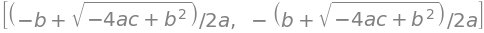

In [161]:
a, b, c, d = sympy.symbols("a, b, c, d")
sympy.solve(a * x**2 + b * x + c, x) # Ecuacion cuadratica

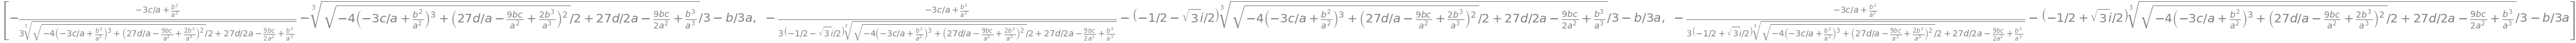

In [162]:
sympy.solve(a * x**3 + b * x ** 2 + c * x + d, x) # Ecuacion cubica

In [166]:
sympy.sin(x) - sympy.cos(x) 

In [164]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

## Sistemas de ecuaciones

Mismo caso, las ecuaciones deben estar igualadas a cero

In [172]:
eq1 = x + 5 * y - 1
eq2 = x - 6* y + 4
sympy.solve([eq1, eq2], [x, y], dict=True)

## Un poco de álgebra lineal

In [173]:
a, b, c, d , e, f  = sympy.symbols("a, b, c, d, e, f")

In [183]:
M1 = sympy.Matrix([[a, b],
                   [c, d],
                   [e,f]])
M2 = sympy.Matrix([[a,c,a],
                   [c,a,c]])
M3 = sympy.Matrix([[a, b],
                   [c, a],
                   [b,c]])

In [184]:
M1

⎡a  b⎤
⎢    ⎥
⎢c  d⎥
⎢    ⎥
⎣e  f⎦

In [185]:
M2

⎡a  c  a⎤
⎢       ⎥
⎣c  a  c⎦

In [186]:
M3

⎡a  b⎤
⎢    ⎥
⎢c  a⎥
⎢    ⎥
⎣b  c⎦

In [180]:
M1 * M2 # Producto de matrices

⎡ 2                     2       ⎤
⎢a  + b⋅c   a⋅b + a⋅c  a  + b⋅c ⎥
⎢                               ⎥
⎢                  2            ⎥
⎢a⋅c + c⋅d  a⋅d + c    a⋅c + c⋅d⎥
⎢                               ⎥
⎣a⋅e + c⋅f  a⋅f + c⋅e  a⋅e + c⋅f⎦

In [188]:
M1 - M3

⎡  0       0   ⎤
⎢              ⎥
⎢  0     -a + d⎥
⎢              ⎥
⎣-b + e  -c + f⎦

In [190]:
M3 + M1

⎡ 2⋅a    2⋅b ⎤
⎢            ⎥
⎢ 2⋅c   a + d⎥
⎢            ⎥
⎣b + e  c + f⎦

In [193]:
sympy.Transpose(M1) # transpuesta de una matrix

        T
⎛⎡a  b⎤⎞ 
⎜⎢    ⎥⎟ 
⎜⎢c  d⎥⎟ 
⎜⎢    ⎥⎟ 
⎝⎣e  f⎦⎠ 

In [194]:
M3 * sympy.Transpose(M1) 

⎡  2    2                       ⎤
⎢ a  + b    a⋅c + b⋅d  a⋅e + b⋅f⎥
⎢                               ⎥
⎢                  2            ⎥
⎢a⋅b + a⋅c  a⋅d + c    a⋅f + c⋅e⎥
⎢                               ⎥
⎣a⋅b + b⋅c  b⋅c + c⋅d  b⋅e + c⋅f⎦